In [386]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
import cv2
import time

## Data Preprocessing

In [387]:
path = 'C:/Users/arund/OneDrive/Desktop/SM_2/Project/images/Train'

In [388]:
n,m = 256,128

In [389]:
data = []
for img in os.listdir(path):
    img = cv2.imread(os.path.join(path,img))
    if img is not None:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to gray image
        resize_img = cv2.resize(gray_img, (n,m)) # Resize to 256x128
        data.append(resize_img)

In [390]:
sym = {0:'100', 1:'10', 2:'200', 3:'20', 4:'500', 5:'50', 6:'Old 100', 7:'Old 10', 8:'Old 20', 9:'Old 50'}

In [391]:
X = np.array(data)
X = X.reshape(X.shape[0],n*m)
X = X/255.0
Y = np.array([[i]*10 for i in range(10)]).flatten()
X.shape, len(Y)

((100, 32768), 100)

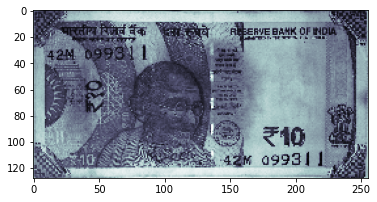

In [392]:
plt.imshow(X[10].reshape(m,n), cmap=plt.cm.bone)

## Splitting Train-Test Data

In [393]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 0) 
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((80, 32768), (20, 32768), (80,), (20,))

## Neural Network

In [394]:
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow
tensorflow.random.set_seed(0)
from numpy.random import seed
seed(0)

In [395]:
Y_train = to_categorical(Y_train)
Y_train.shape, X_train.shape

((80, 10), (80, 32768))

In [396]:
NN = models.Sequential()
NN.add(layers.Dense(1024, activation = 'tanh', input_shape = (X_train.shape[1],)))
NN.add(layers.Dense(512, activation = 'relu'))
NN.add(layers.Dense(256, activation = 'relu'))
NN.add(layers.Dense(10, activation = 'Softmax'))

In [397]:
NN.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1024)              33555456  
_________________________________________________________________
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                2570      
Total params: 34,214,154
Trainable params: 34,214,154
Non-trainable params: 0
_________________________________________________________________


In [398]:
NN.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [399]:
start = time.time()
NN.fit(X_train, Y_train, epochs = 150, batch_size=15)
nn_time = time.time() - start

Epoch 1/150
6/6 [==============================] - 4s 460ms/step - loss: 4.8314 - accuracy: 0.0750
Epoch 2/150
6/6 [==============================] - 3s 430ms/step - loss: 3.1894 - accuracy: 0.1375
Epoch 3/150
6/6 [==============================] - 3s 423ms/step - loss: 2.4822 - accuracy: 0.0875
Epoch 4/150
6/6 [==============================] - 3s 559ms/step - loss: 2.4718 - accuracy: 0.1375
Epoch 5/150
6/6 [==============================] - 3s 457ms/step - loss: 2.6140 - accuracy: 0.0500
Epoch 6/150
6/6 [==============================] - 3s 420ms/step - loss: 2.4872 - accuracy: 0.0875
Epoch 7/150
6/6 [==============================] - 2s 407ms/step - loss: 2.4594 - accuracy: 0.0750
Epoch 8/150
6/6 [==============================] - 3s 427ms/step - loss: 2.3817 - accuracy: 0.1000
Epoch 9/150
6/6 [==============================] - 3s 407ms/step - loss: 2.3492 - accuracy: 0.0750
Epoch 10/150
6/6 [==============================] - 3s 427ms/step - loss: 2.3686 - accuracy: 0.1125
Epoch 11/

6/6 [==============================] - 3s 467ms/step - loss: 2.2935 - accuracy: 0.1250
Epoch 84/150
6/6 [==============================] - 3s 449ms/step - loss: 2.2937 - accuracy: 0.1250
Epoch 85/150
6/6 [==============================] - 3s 458ms/step - loss: 2.2933 - accuracy: 0.1000
Epoch 86/150
6/6 [==============================] - 3s 480ms/step - loss: 2.2937 - accuracy: 0.1250
Epoch 87/150
6/6 [==============================] - 3s 439ms/step - loss: 2.2937 - accuracy: 0.0875
Epoch 88/150
6/6 [==============================] - 3s 556ms/step - loss: 2.2931 - accuracy: 0.1250
Epoch 89/150
6/6 [==============================] - 3s 421ms/step - loss: 2.2935 - accuracy: 0.1250
Epoch 90/150
6/6 [==============================] - 3s 431ms/step - loss: 2.2935 - accuracy: 0.1250
Epoch 91/150
6/6 [==============================] - 3s 447ms/step - loss: 2.2936 - accuracy: 0.1250
Epoch 92/150
6/6 [==============================] - 3s 498ms/step - loss: 2.2933 - accuracy: 0.1250
Epoch 93/150


In [400]:
pred_nn = NN.predict(X_val)

In [401]:
predict_nn = [np.argmax(pred_nn[i], axis = -1) for i in range(X_val.shape[0])]

In [402]:
actual = [f'{sym[i]} Rupees' for i in Y_val]
pred = [f'{sym[i]} Rupees' for i in predict_nn]

In [403]:
pd.DataFrame(zip(actual, pred), columns = ['Actual', 'Predicted'])

,Actual,Predicted
0,200 Rupees,Old 100 Rupees
1,Old 20 Rupees,Old 100 Rupees
2,100 Rupees,Old 100 Rupees
3,50 Rupees,Old 100 Rupees
4,Old 10 Rupees,Old 100 Rupees
5,Old 50 Rupees,Old 100 Rupees
6,10 Rupees,Old 100 Rupees
7,Old 10 Rupees,Old 100 Rupees
8,50 Rupees,Old 100 Rupees
9,Old 50 Rupees,Old 100 Rupees


## Metrics

In [404]:
from sklearn.metrics import confusion_matrix,classification_report

In [405]:
confusion_matrix(predict_nn, Y_val)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 2, 3, 2, 3, 0, 3, 1, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [406]:
print(classification_report(Y_val, predict_nn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       3.0
           3       0.00      0.00      0.00       2.0
           5       0.00      0.00      0.00       3.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       3.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       3.0

    accuracy                           0.00      20.0
   macro avg       0.00      0.00      0.00      20.0
weighted avg       0.00      0.00      0.00      20.0



C:\Users\arund\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arund\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arund\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arund\anaconda3\lib\site-packages\sklearn\metrics\_cla

## Accuracy

In [407]:
Y_val = to_categorical(Y_val)

In [408]:
val_loss, val_acc = NN.evaluate(X_val, Y_val)
print(f'ACCURACY : {val_acc}, \nLOSS : {val_loss}')

1/1 [==============================] - 1s 823ms/step - loss: 2.3813 - accuracy: 0.0000e+00
ACCURACY : 0.0, 
LOSS : 2.3813068866729736


## PCA

In [409]:
from sklearn.decomposition import PCA

In [410]:
def evaluate(components, eigenValues, eigenVectors, df):
    weightage = {}
    
    col = ['PC'+ str(i+1) for i in range(components.shape[1])]
    transform = pd.DataFrame(components, columns = col)
    #display(transform)
    
    var = eigenValues/sum(eigenValues)
    for i in range(1,len(var)+1):
        if sum(var[:i])>=0.9:
            no_of_pc = i
            break
    print(f'\n{no_of_pc} components explains 90% or more variability')
    
    for i in range(no_of_pc):
        top_n = np.argsort( abs(eigenVectors[i]) )[::-1][:4] # shows top 4 affecting features
        weightage['PC'+str(i+1)] = [str(round(abs(eigenVectors[i][j]),4)) for j in top_n]
    
    impact = pd.DataFrame.from_dict(weightage, orient='index')
    impact['Eigen Values'] = eigenValues[:no_of_pc]
    impact['Variability (%)'] = var[:no_of_pc]
    impact['Cummulative Variability (%)'] = [sum(var[:i]) for i in range(1,no_of_pc+1)]
    #display(impact)
    return transform, impact, no_of_pc

In [411]:
def PCA_lib(df):
    pca = PCA()
    pca.fit(df)
    eigenVectors = pca.components_.T
    eigenValues = pca.explained_variance_
    components = pca.transform(df)
    return pca, components, eigenValues, eigenVectors

In [412]:
pca, components, eigenValues, eigenVectors = PCA_lib(X)

In [413]:
X_pca, impact, no_of_pc = evaluate(components, eigenValues, eigenVectors, X)


62 components explains 90% or more variability


In [414]:
X.shape, X_pca.shape, Y.shape

((100, 32768), (100, 100), (100,))

### Eigen Values

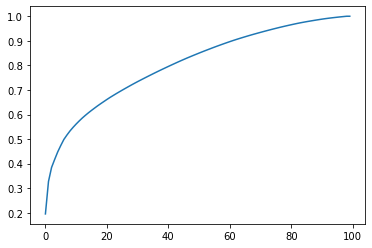

In [415]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### Average Face

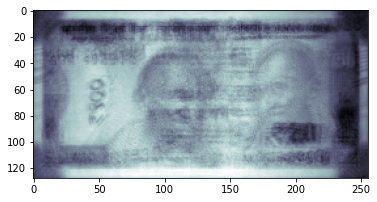

In [416]:
plt.imshow(pca.mean_.reshape(m,n),cmap=plt.cm.bone)

### Eigen Face

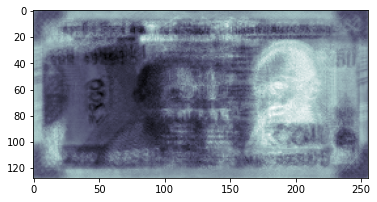

In [417]:
plt.imshow(eigenVectors.T[0].reshape(m,n),cmap=plt.cm.bone)

### Omega (Principal Components)

In [418]:
projected_train = pca.fit_transform(X) 
projected_train.shape

(100, 100)

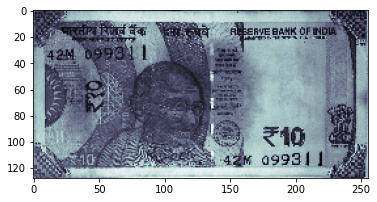

In [419]:
inv_proj = pca.inverse_transform(projected_train)
plt.imshow(inv_proj[10].reshape(m,n),cmap=plt.cm.bone)

## Splitting into Train-Test data

In [420]:
X_pca_train, X_pca_val, Y_train, Y_val = train_test_split(X_pca, Y, test_size = 0.2, random_state = 0) 
X_pca_train.shape, X_pca_val.shape, Y_train.shape, Y_val.shape

((80, 100), (20, 100), (80,), (20,))

In [421]:
Y_train = to_categorical(Y_train)
Y_train.shape, X_pca_train.shape

((80, 10), (80, 100))

## Neural Network with PCA

In [422]:
NN_pca = models.Sequential()
NN_pca.add(layers.Dense(1024, activation = 'tanh', input_shape = (X_pca_train.shape[1],)))
NN_pca.add(layers.Dense(512, activation = 'relu'))
NN_pca.add(layers.Dense(256, activation = 'relu'))
NN_pca.add(layers.Dense(10, activation = 'Softmax'))

In [423]:
NN_pca.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1024)              103424    
_________________________________________________________________
dense_37 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_39 (Dense)             (None, 10)                2570      
Total params: 762,122
Trainable params: 762,122
Non-trainable params: 0
_________________________________________________________________


In [424]:
NN_pca.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [425]:
start = time.time()
NN_pca.fit(X_pca_train, Y_train, epochs = 150, batch_size=15)
nn_pca_time = time.time()-start

Epoch 1/150
6/6 [==============================] - 1s 18ms/step - loss: 1.2399 - accuracy: 0.5375
Epoch 2/150
6/6 [==============================] - 0s 12ms/step - loss: 0.0324 - accuracy: 0.9875
Epoch 3/150
6/6 [==============================] - 0s 29ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 4/150
6/6 [==============================] - 0s 17ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 5/150
6/6 [==============================] - 0s 19ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 6/150
6/6 [==============================] - 0s 19ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 7/150
6/6 [==============================] - 0s 19ms/step - loss: 8.4453e-04 - accuracy: 1.0000
Epoch 8/150
6/6 [==============================] - 0s 11ms/step - loss: 6.2296e-04 - accuracy: 1.0000
Epoch 9/150
6/6 [==============================] - 0s 11ms/step - loss: 4.4120e-04 - accuracy: 1.0000
Epoch 10/150
6/6 [==============================] - 0s 11ms/step - loss: 3.2077e-04 - accuracy: 1.0000
Epo

In [426]:
pred_nn_pca = NN_pca.predict(X_pca_val)

In [427]:
predict_nn_pca = [np.argmax(pred_nn_pca[i], axis = -1) for i in range(X_pca_val.shape[0])]

In [428]:
actual_pca = [f'{sym[i]} Rupees' for i in Y_val]
pred_pca = [f'{sym[i]} Rupees' for i in predict_nn_pca]

In [429]:
pd.DataFrame(zip(actual_pca, pred_pca), columns = ['Actual', 'Predicted'])

,Actual,Predicted
0,200 Rupees,200 Rupees
1,Old 20 Rupees,Old 20 Rupees
2,100 Rupees,100 Rupees
3,50 Rupees,50 Rupees
4,Old 10 Rupees,Old 10 Rupees
5,Old 50 Rupees,Old 50 Rupees
6,10 Rupees,10 Rupees
7,Old 10 Rupees,Old 10 Rupees
8,50 Rupees,50 Rupees
9,Old 50 Rupees,Old 50 Rupees


## Metrics

In [430]:
confusion_matrix(predict_nn_pca, Y_val)

array([[2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3]], dtype=int64)

In [431]:
print(classification_report(Y_val, predict_nn_pca))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2
           2       1.00      0.67      0.80         3
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3

    accuracy                           0.85        20
   macro avg       0.85      0.76      0.79        20
weighted avg       0.97      0.85      0.89        20



C:\Users\arund\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arund\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arund\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Accuracy

In [432]:
Y_val = to_categorical(Y_val)

In [433]:
val_loss_pca, val_acc_pca = NN_pca.evaluate(X_pca_val, Y_val)
print(f'ACCURACY : {val_acc_pca}, \nLOSS : {val_loss_pca}')

1/1 [==============================] - 0s 245ms/step - loss: 0.4241 - accuracy: 0.8500
ACCURACY : 0.8500000238418579, 
LOSS : 0.4241112172603607


## Comparison

In [434]:
nn_time = str(round(nn_time,2)) + ' sec'
nn_pca_time = str(round(nn_pca_time,2)) + ' sec'

In [435]:
pd.DataFrame([[val_acc, val_loss, nn_time],[val_acc_pca, val_loss_pca, nn_pca_time]], columns = ['Accuracy', 'Loss', 'Time Taken'], index = ['Without PCA', 'With PCA'])

,Accuracy,Loss,Time Taken
Without PCA,0.00,2.381307,401.51 sec
With PCA,0.85,0.424111,11.66 sec


## Test

In [436]:
path = 'C:/Users/arund/OneDrive/Desktop/SM_2/Project/images/Test'

In [437]:
test_data = []
for img in os.listdir(path):
    img = cv2.imread(os.path.join(path,img))
    if img is not None:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to gray image
        resize_img = cv2.resize(gray_img, (n,m)) # Resize to 256x128
        test_data.append(resize_img)

In [438]:
X_test = np.array(test_data)
X_test = X_test.reshape(X_test.shape[0],n*m)
X_test = X_test/255.0
Y_test = [1,0,3,2,5,4,7,6,8,9]
X_test.shape, len(Y_test)

((10, 32768), 10)

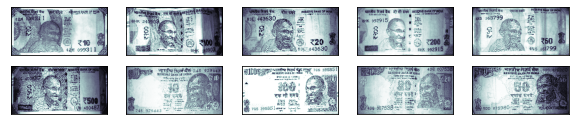

In [439]:
fig = plt.figure(figsize=(10,2))
# plot several images
for i in range(X_test.shape[0]):
    ax = fig.add_subplot(2,5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(m,n), cmap=plt.cm.bone)

### Fit PCA

In [440]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(10, 100)

### Predict

In [441]:
pred_test = NN_pca.predict(X_test_pca)

In [442]:
predict_test = [np.argmax(pred_test[i], axis = -1) for i in range(X_test_pca.shape[0])]

### Accuracy

In [443]:
actual_test = [f'{sym[i]} Rupees' for i in Y_test]
pred_test = [f'{sym[i]} Rupees' for i in predict_test]

In [444]:
pd.DataFrame(zip(actual_test, pred_test), columns = ['Actual', 'Predicted'])

,Actual,Predicted
0,10 Rupees,10 Rupees
1,100 Rupees,100 Rupees
2,20 Rupees,20 Rupees
3,200 Rupees,200 Rupees
4,50 Rupees,50 Rupees
5,500 Rupees,500 Rupees
6,Old 10 Rupees,Old 20 Rupees
7,Old 100 Rupees,Old 100 Rupees
8,Old 20 Rupees,Old 20 Rupees
9,Old 50 Rupees,Old 50 Rupees


In [445]:
Y_test = to_categorical(Y_test)

In [446]:
test_loss, test_acc = NN_pca.evaluate(X_test_pca, Y_test)
print(f'ACCURACY : {test_acc}, \nLOSS : {test_loss}')

1/1 [==============================] - 1s 554ms/step - loss: 0.5620 - accuracy: 0.9000
ACCURACY : 0.8999999761581421, 
LOSS : 0.5620048642158508
